In [25]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




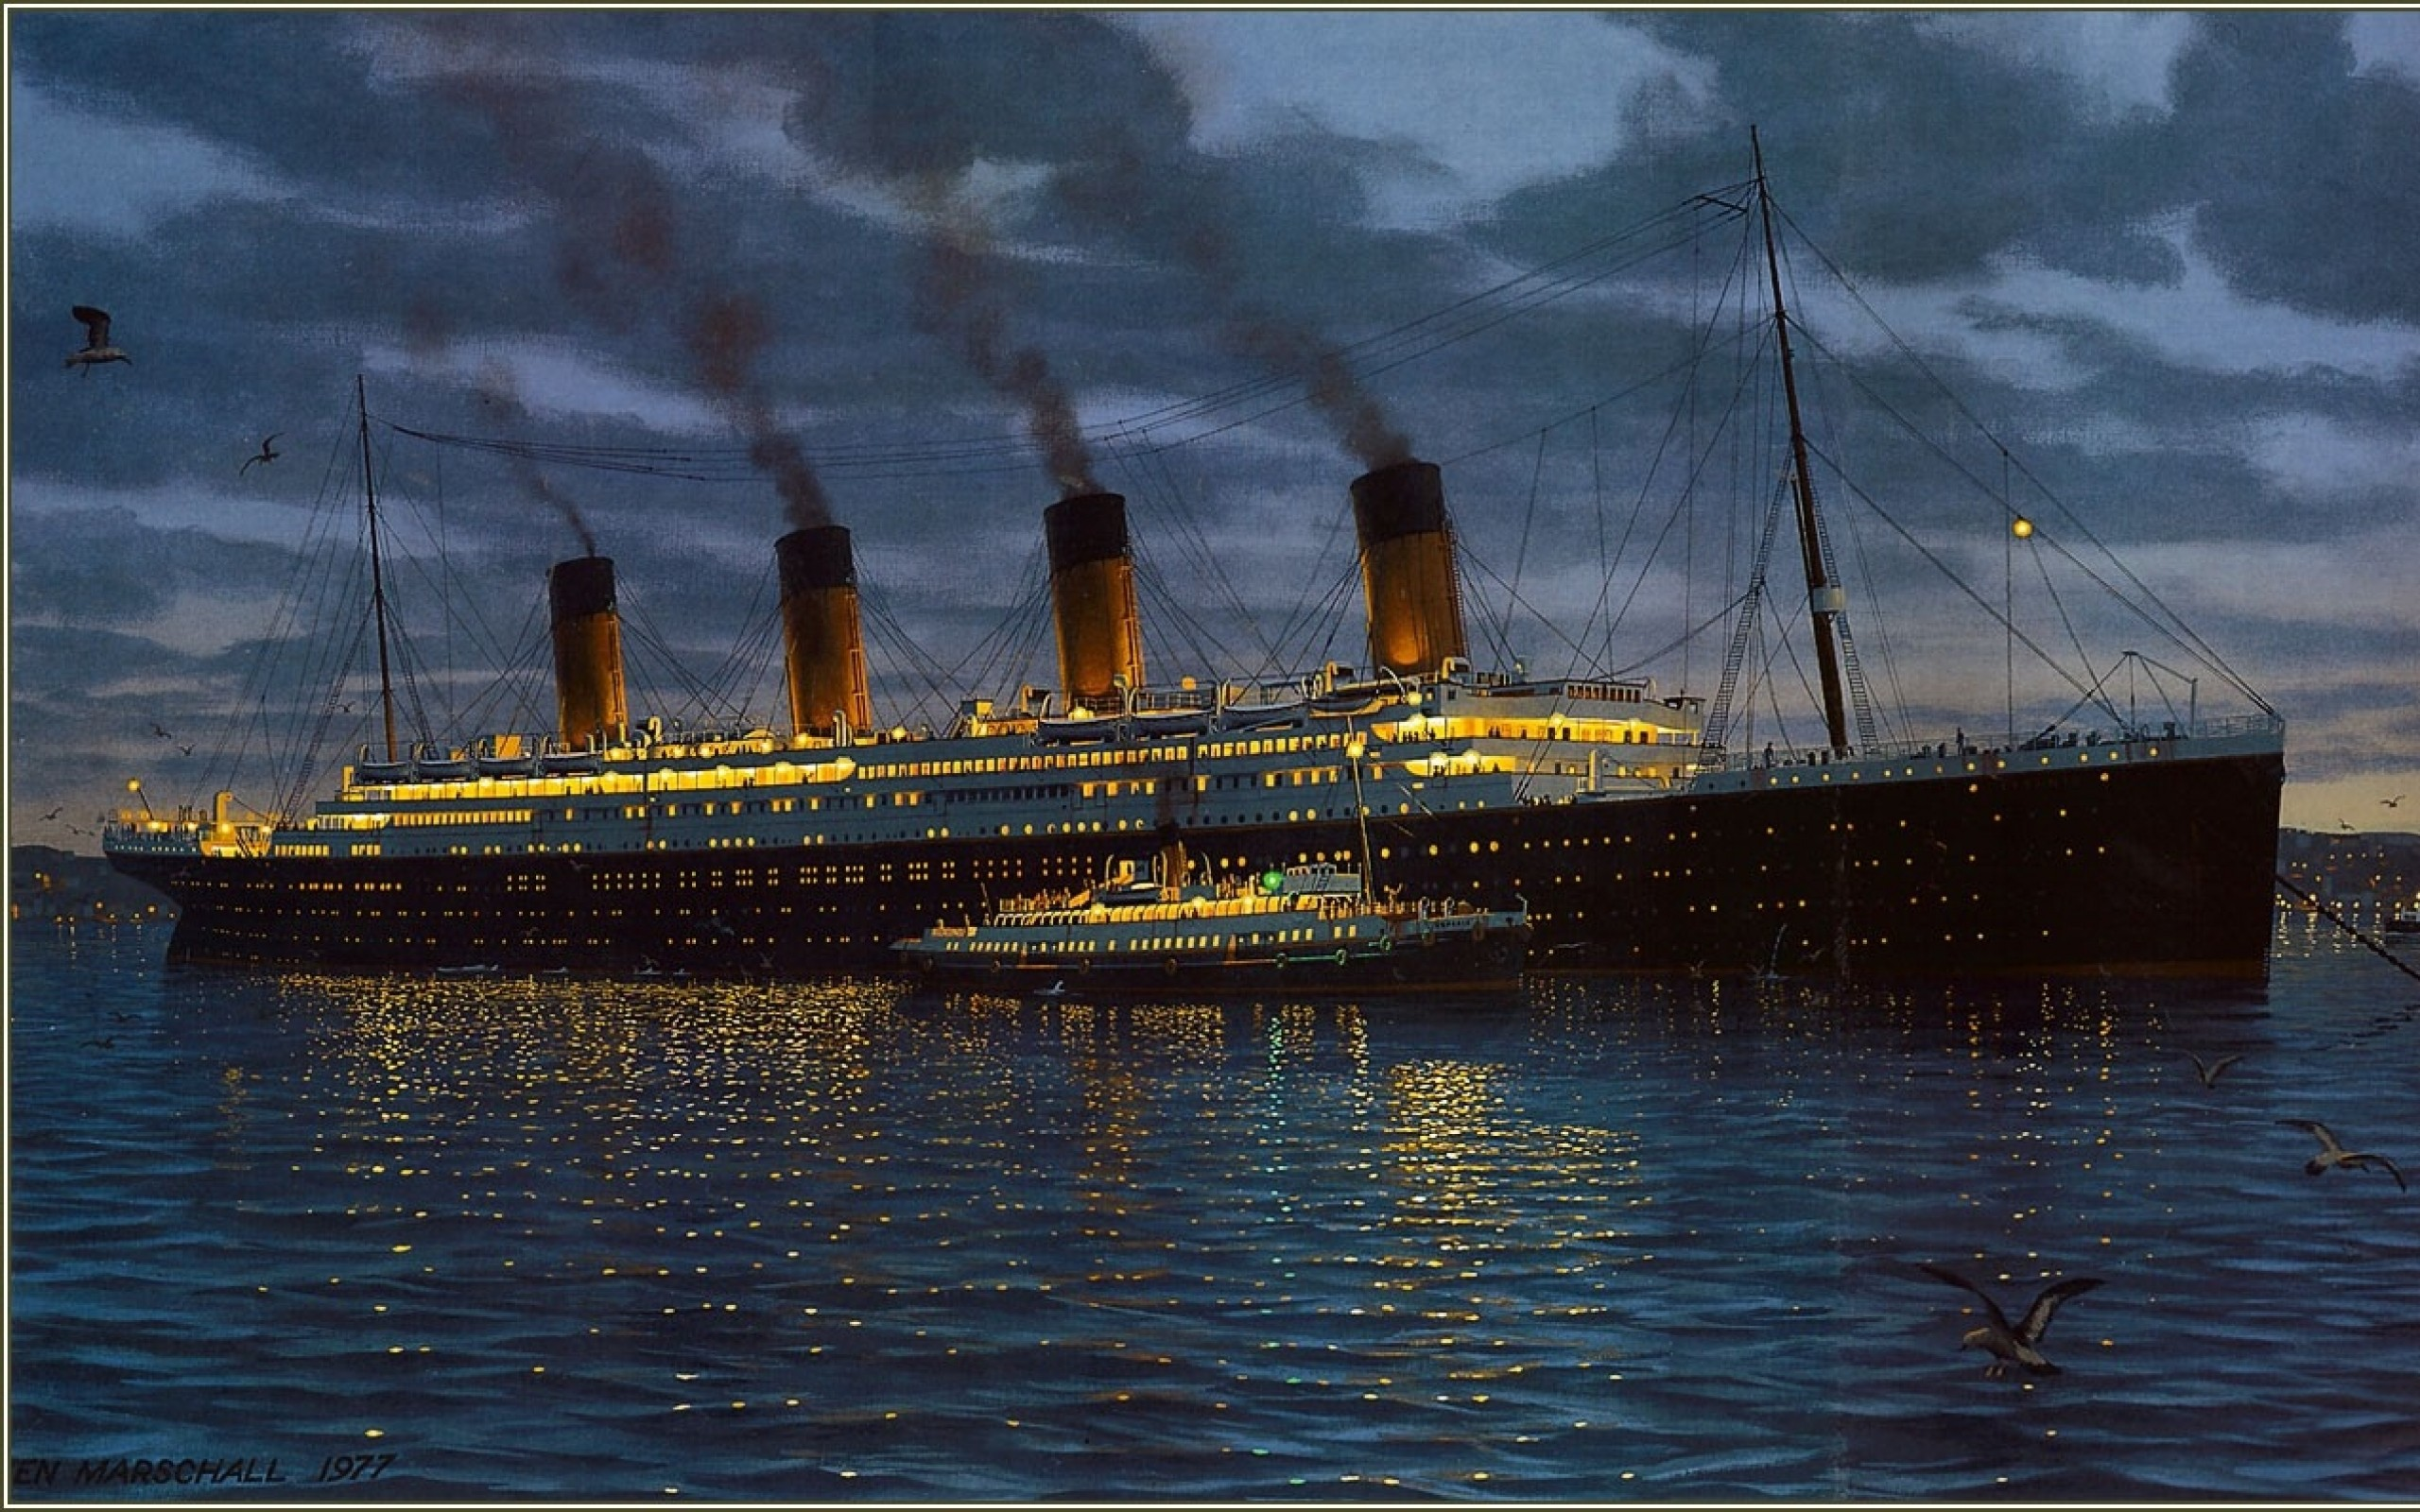

In [78]:
from IPython.display import Image
Image("C:/Users/HP/Pictures/titanic.jpg")

In [79]:
titanic_data = pd.read_csv('C:/Users/HP/Downloads/train.csv')
test_data = pd.read_csv('C:/Users/HP/Downloads/test.csv')

In [27]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
x=titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [30]:
x=pd.get_dummies(x)

In [31]:
x = x.fillna(28)


In [32]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [82]:
def bar_chart(feature):
    survived = titanic_data[titanic_data['Survived']==1][feature].value_counts()
    dead = titanic_data[titanic_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

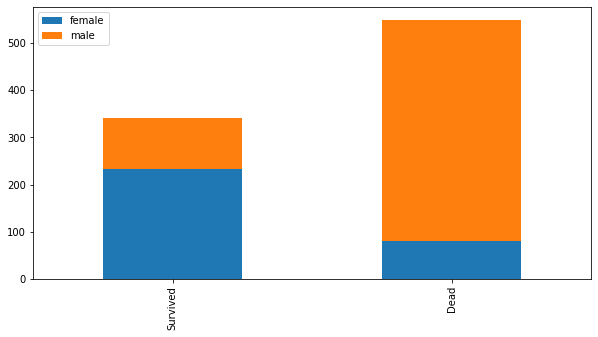

In [83]:
bar_chart('Sex')

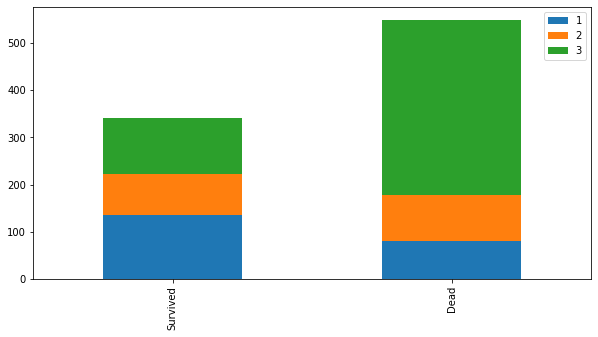

In [84]:
bar_chart('Pclass')

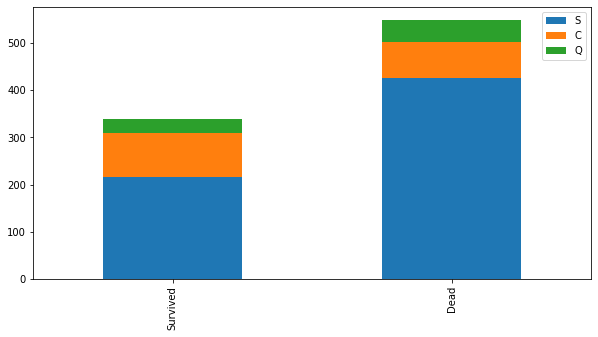

In [90]:
bar_chart('Embarked')

In [91]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [92]:
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [95]:
x_train.shape

(596, 10)

In [96]:
clf.score(x,y)

0.9797979797979798

In [97]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [98]:
clf.score(x_train, y_train)

0.9798657718120806

In [99]:
clf.score(x_test, y_test)

0.7694915254237288

In [100]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [101]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
clf.score(x_train, y_train)

0.8238255033557047

In [103]:
clf.score(x_test, y_test)

0.8203389830508474

In [104]:
max_depth_values = range(1, 100)


In [105]:
scores_data = pd.DataFrame()

In [106]:
for max_depth in max_depth_values:
    clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    mean_cross_val_score=cross_val_score(clf, x_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score':[test_score],
                                   'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)
    

In [107]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.796942


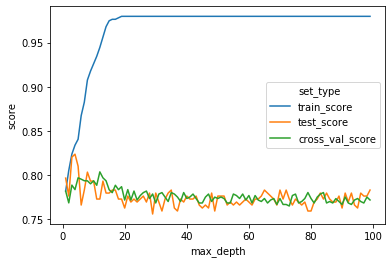

In [118]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [117]:
cross_val_score(clf, x_test, y_test, cv=5).mean()

0.7694915254237288